In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats

In [55]:
geolocation= pd.read_csv (r'C:\Users\user pc\Downloads\ecommerce\geolocation_dataset.csv')
items= pd.read_csv (r'C:\Users\user pc\Downloads\ecommerce\items_dataset.csv')
order_payments= pd.read_csv (r'C:\Users\user pc\Downloads\ecommerce\order_payments_dataset.csv')
order_reviews= pd.read_csv (r'C:\Users\user pc\Downloads\ecommerce\order_reviews_dataset.csv')
orders= pd.read_csv (r'C:\Users\user pc\Downloads\ecommerce\orders_dataset.csv')
product_category_name_translation = pd.read_csv(r'C:\Users\user pc\Downloads\ecommerce\product_category_name_translation.csv')
products = pd.read_csv(r'C:\Users\user pc\Downloads\ecommerce\products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\user pc\Downloads\ecommerce\sellers_dataset.csv')

### Analysis for orders

In [5]:
order_payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [188]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#orders.dtypes
orders_mod = orders.copy()
orders_mod["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod.dtypes
#new.head()

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

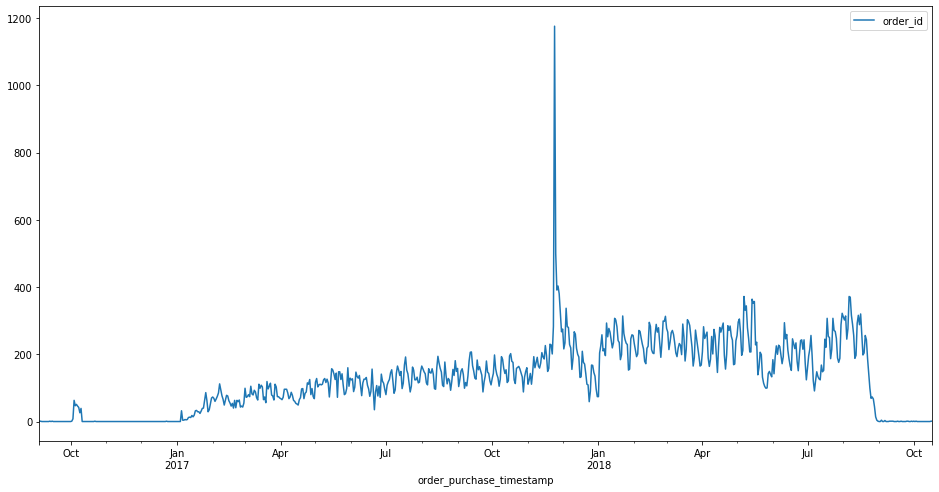

In [9]:
counts = orders_mod.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

Text(0.5, 1.0, 'Histogram of payments values (cut at 95th quantile)')

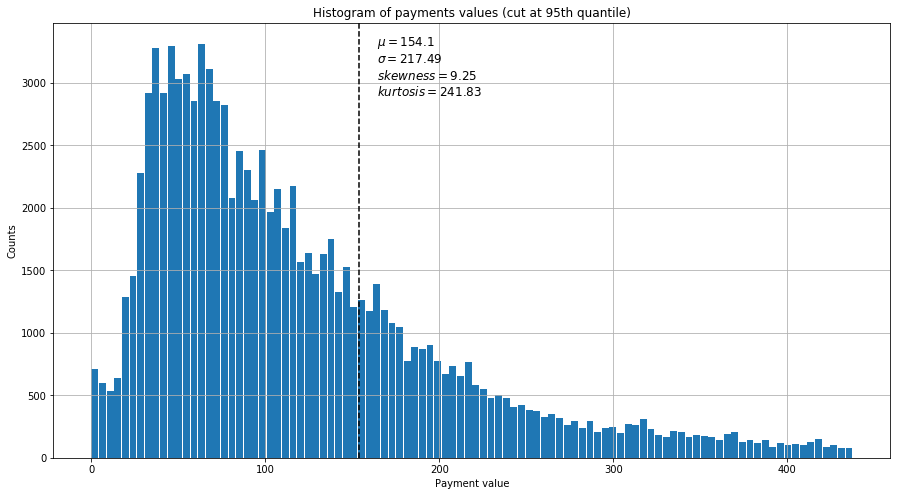

In [11]:
mean = order_payments["payment_value"].mean()
std =  order_payments["payment_value"].std()
skew =  order_payments["payment_value"].skew()
kurt =  order_payments["payment_value"].kurtosis()

text1 = '$\mu=$' + str(round(mean,2))
text2 = '$\sigma=$' +str(round(std,2))
text3 = '$skewness=$' + str(round(skew,2))
text4 = '$kurtosis=$' + str(round(kurt,2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4

q95 =  order_payments["payment_value"].quantile(.95)
payments_q95 =  order_payments[ order_payments["payment_value"]<q95]

payments_q95.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)
plt.axvline(mean, color='k', linestyle='--')
plt.text(mean+10, 2900, text, fontsize=12)
plt.xlabel("Payment value")
plt.ylabel("Counts")
plt.title("Histogram of payments values (cut at 95th quantile)")

Text(0, 0.5, '')

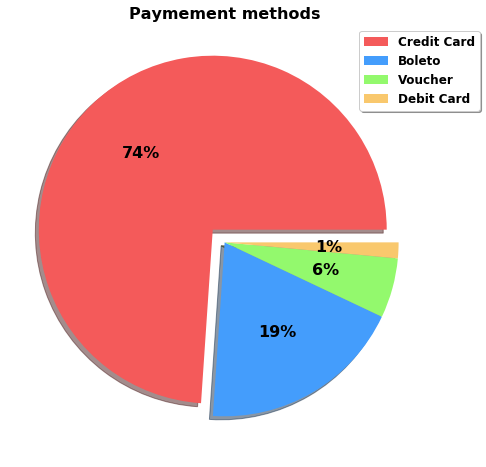

In [14]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = order_payments["payment_type"][order_payments["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Paymement methods", fontweight='bold', size=16)
plt.ylabel("")

### Delivery time

In [16]:
# Data preparation
def convert(db,columns_list):
    for column in columns_list:
        db[column] = pd.to_datetime(db[column])

orders_mod = orders.copy()
cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

convert(orders_mod,cols)
orders_mod['delivery_time'] = orders_mod['order_delivered_carrier_date'] - orders_mod['order_purchase_timestamp']
q95 = orders_mod['delivery_time'].quantile(.95)

delivered = orders_mod[orders_mod["order_status"]=="delivered"]
delivered.set_index(delivered['order_purchase_timestamp'], inplace = True)

delivered = delivered.sort_index()
delivered["dts"] = delivered["delivery_time"].dt.total_seconds()
delivered = delivered["dts"].resample("D").mean()
delivered = round(delivered/86400,2)
delivered = delivered[delivered<8]
print(delivered.describe())
m_del = delivered.mean()

count    603.000000
mean       3.252405
std        0.855460
min        0.230000
25%        2.655000
50%        3.170000
75%        3.770000
max        6.480000
Name: dts, dtype: float64


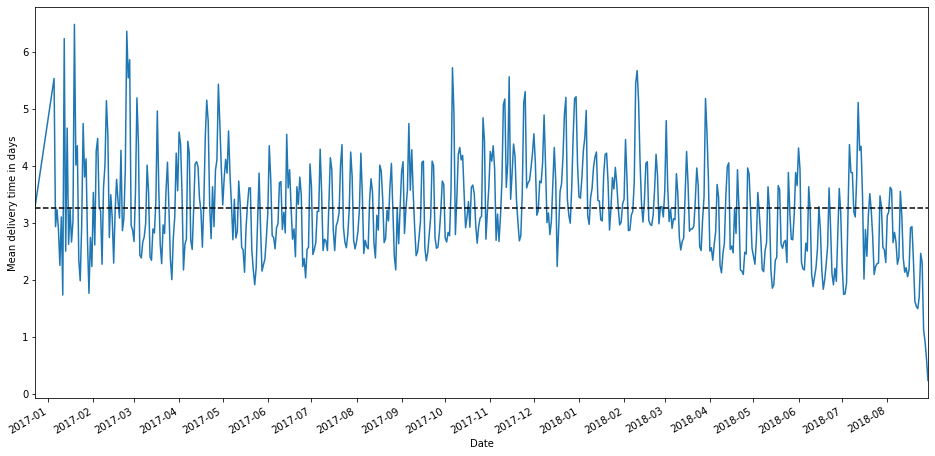

In [17]:
ax = delivered.plot(figsize=(16,8))
plt.axhline(m_del,color="k",linestyle='--')
plt.xlabel("Date")
plt.ylabel("Mean delivery time in days")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

In [19]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [58]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Sellers

In [100]:
temp_sellers = sellers.merge(geolocation, left_on= sellers['seller_zip_code_prefix'], 
                             right_on = geolocation['geolocation_zip_code_prefix'], how = 'inner')

In [79]:
len(sellers)==len(sellers['seller_id'].unique()) #make sure that the seller_id only contains unique values

True

In [93]:
item_prod = items.merge(products, left_on = items['order_id'],
                       right_on = products['product_id'], how = 'inner')

In [98]:
temp_sellers.head()

,key_0,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,13023,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP
1,13023,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP
2,13023,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP
3,13023,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP
4,13023,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP


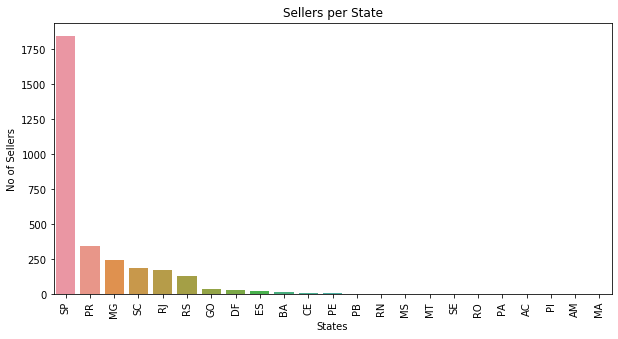

In [187]:
plt.figure(figsize=(10,5))
sns.barplot(y=sellers['seller_state'].value_counts().values,x=sellers['seller_state'].value_counts().index)
plt.xlabel('States')
plt.ylabel('No of Sellers')
plt.title('Sellers per State')
z=plt.xticks(rotation=90)

In [108]:
X=pd.to_datetime(orders['order_delivered_customer_date'])-pd.to_datetime(orders['order_purchase_timestamp'])

In [104]:
for i in range(0,len(X)):
    X[i]=X[i].days

Text(0, 0.5, 'Frequency')

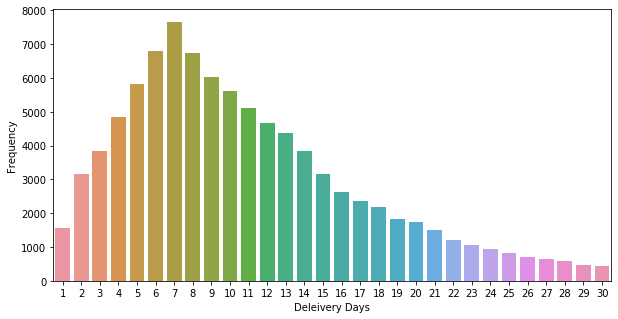

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x=X.value_counts().sort_values(ascending=False).head(30).index,y=X.value_counts().sort_values(ascending=False).head(30).values)
plt.xlabel('Deleivery Days')
plt.ylabel('Frequency')

In [116]:
p_5s = len(order_reviews[order_reviews['review_score'] == 5]) * 100 / len(order_reviews)
p_1s = len(order_reviews[order_reviews['review_score'] == 1]) * 100 / len(order_reviews)
first_dt = order_reviews['review_creation_date'].min()
last_dt = order_reviews['review_creation_date'].max()
avg_s = order_reviews['review_score'].mean()
print(len(order_reviews), 'reviews')
print('First:', first_dt)
print('Last:', last_dt)
print(f'5: {p_5s:.1f}%')
print(f'1: {p_1s:.1f}%')
print(f'Average: {avg_s:.1f}')

100000 reviews
First: 2016-10-02 00:00:00
Last: 2018-08-31 00:00:00
5: 57.4%
1: 11.9%
Average: 4.1


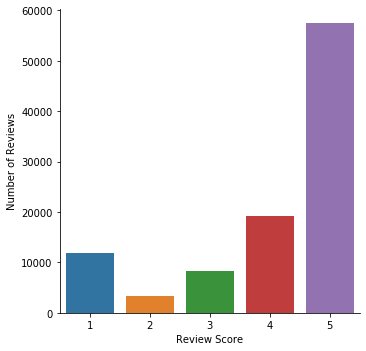

In [115]:
 sns.catplot(
    x='review_score', 
    kind='count', 
    data=order_reviews, 
   
).set(
    xlabel='Review Score', 
    ylabel='Number of Reviews',
);

In [117]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [125]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [128]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [136]:
order_by_category = product_category_name_translation.groupby('product_category_name_english').size().reset_index(name='total_orders')
order_by_category_top10 = order_by_category.sort_values(by='total_orders', ascending=False).head(10)

In [137]:
order_by_category_top10

,product_category_name_english,total_orders
0,agro_industry_and_commerce,1
45,home_appliances_2,1
51,kitchen_dining_laundry_garden_furniture,1
50,industry_commerce_and_business,1
49,housewares,1
48,home_construction,1
47,home_confort,1
46,home_comfort_2,1
44,home_appliances,1
53,luggage_accessories,1


In [148]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [166]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


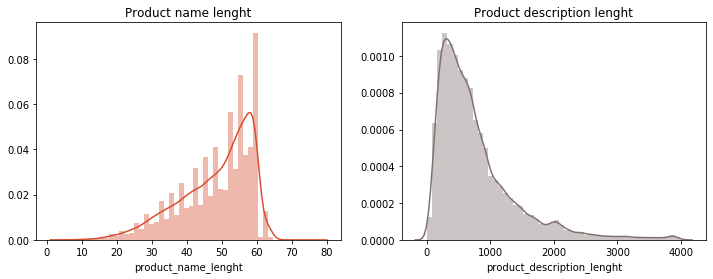

In [190]:
products = products.dropna(how = 'any')
#product_name_lenght	product_description_lenght	product_photos_qty
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Product name lenght")
axis[1].set_title("Product description lenght")
ax1 = sns.distplot(products['product_name_lenght'], color="#D84E30", ax=axis[0]) #rgba(204,204,204,1)', 'rgba(222,45,38,0.8)'
ax2 = sns.distplot(products['product_description_lenght'], color="#7E7270", ax=axis[1]) #"#D84E30"

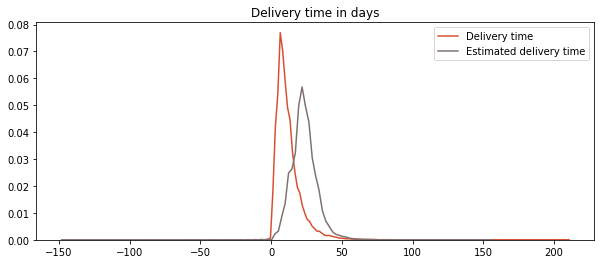

In [169]:
# Convert columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_aproved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
# Calculate differences in hours
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_aproved_at']).dt.total_seconds() / 86400
orders['estimated_delivery_time'] = (orders['order_estimated_delivery_date'] - orders['order_aproved_at']).dt.total_seconds() / 86400
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
ax1 = sns.kdeplot(orders['delivery_time'].dropna(), color="#D84E30", label='Delivery time')
ax2 = sns.kdeplot(orders['estimated_delivery_time'].dropna(), color="#7E7270", label='Estimated delivery time')

In [182]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
